
# Tuning an $n$-gram model

The following is scaffolding code that you can expand to complete the problem.  First, we set up the training, validation, and test datasets (for real-size modeling problems you would read these from files):

In [ ]:
training_set = [['dogs', 'chase', 'cats'],
['dogs', 'bark'],
['cats', 'meow'],
['dogs', 'chase', 'birds'],
['birds', 'chase', 'cats'],
['dogs', 'chase', 'the', 'cats'],
['the', 'birds', 'chirp']]

validation_set = [['the','cats','meow'],
                  ['the','dogs','bark'],
                  ['the','dogs','chase','the','cats']]

test_set = [['cats','meow'],['dogs','chase','the','birds']]

A natural way to implement a model is often to define a class that you can give model hyper-parameters, and define methods for training the model, computing the most basic building-block quantity relevant for the model, and assessing overall performance of a trained model on a dataset.  Below is scaffolding code for doing this.  For a bigram model, the most elementary quantity is $p(w_i|w_{i-1})$ so that is what the `prob()` method gives.

You don't need to use this scaffolding code in your solution to the problem, but you may find it useful.

For step 1 of this problem, you need to find the value of $\alpha$ that optimizes validation-set perplexity; this is a simple example of what in machine learning these days "hyperparameter tuning" or "[hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)".

In [ ]:
#count unique words without the char indicating the beginning of the sentence.
def count_unique_words(data):
    unique_words = set()
    for sentence in data:
        for word in sentence:
            unique_words.add(word)

    unique_words.discard('s')
    return len(unique_words)

In [ ]:
#count the number of tokens (non unique) without the char indicating
#the beginning of the sentence.
def count_tokens(data):
  count = 0
  for sentence in data:
      for value in sentence:
          if (value!= 's'):
            count += 1

  return count

In [ ]:
import math
from collections import Counter

class bigram_model:

  def train(self,training_set):
    new_value_start = 's'
    new_value_end = '/s'
    new_data = [[new_value_start] + row + [new_value_end] for row in training_set]
    return new_data

  #calculate n-gram probabilities
  def prob(self,data, bonus):
    word_counts = {}
    pair_counts = {}

    for sentence in data:
       for i in range(len(sentence)-1):
            prev_word = sentence[i]
            curr_word = sentence[i+1]
            if prev_word in word_counts:
                word_counts[prev_word] += 1
            else:
                word_counts[prev_word] = 1
            pair = (curr_word, prev_word)
            if pair in pair_counts:
                pair_counts[pair] += 1
            else:
                pair_counts[pair] = 1

    if not bonus:
      for word1 in word_counts.keys():
        if word1!= 's':
          for word2 in word_counts.keys():
              if (word1, word2) not in pair_counts:
                  pair_counts[(word1, word2)] = 0


    return  pair_counts, word_counts


#calculate the perplexity of a model
  def perplexity(self,data, pair_counts, word_counts, alpha, V):

    bigram_probabilities = {}
    for pair in pair_counts:
        prev_word = pair[1]
        bigram_probabilities[pair] = (pair_counts[pair]+alpha) / (word_counts[prev_word]+(alpha*V))

#find the words of the given data that appear on the trainset
    pairs= set()
    for sentence in data:
        for i in range(len(sentence)-1):
            prev_word = sentence[i]
            curr_word = sentence[i+1]
            pair = (curr_word, prev_word)
            pairs.add(pair)

    data_dict = {}
    for key in bigram_probabilities.keys():
        if key in pairs:
          data_dict[key] = bigram_probabilities[key]

#perplexity calculation
    N= count_unique_words(data)
    log_sum = 0
    for value in data_dict.values():
      log_sum = log_sum - math.log(value, 2)

    mean_surprisal = (1/N)*(log_sum)
    return math.pow(2, mean_surprisal)

In [ ]:
#create a bigram model
model = bigram_model()
trained_data = model.train(training_set)

V= count_unique_words(trained_data)
pair_counts, word_counts = model.prob(trained_data,0)

For step 2, write a function which returns the perplexities of the validation and test sets for a given alpha. Next, graph in a lineplot the validation and test set perplexities for a range of alphas that reveals the full relationship between validation and test set perplexities.

In [ ]:
import numpy as np

def perplexities_from_alpha(alpha, validation_set, test_set, model, pair_counts, word_counts):
  validation_perplexity= model.perplexity(validation_set, pair_counts, word_counts, alpha, V)
  test_perplexity=  model.perplexity(test_set, pair_counts,word_counts,alpha,V)

  return( (validation_perplexity,test_perplexity) )

def calculate_perplexity(validation_set, test_set, model, pair_counts, word_counts):
  #alphas = np.arange(0.00001,1, 0.001)
  alphas = np.arange(0.0001,1, 0.01)

  alpha_prep_validation=[]
  alpha_prep_test=[]
  for alpha in alphas:
    validation_perplexity, testset_perplexity= perplexities_from_alpha(alpha, validation_set, test_set, model, pair_counts, word_counts)
    alpha_prep_validation.append(validation_perplexity)
    alpha_prep_test.append(testset_perplexity)


  df = pd.DataFrame({
      'alpha': alphas,
      'validation': alpha_prep_validation,
      'test': alpha_prep_test
  })

  return df

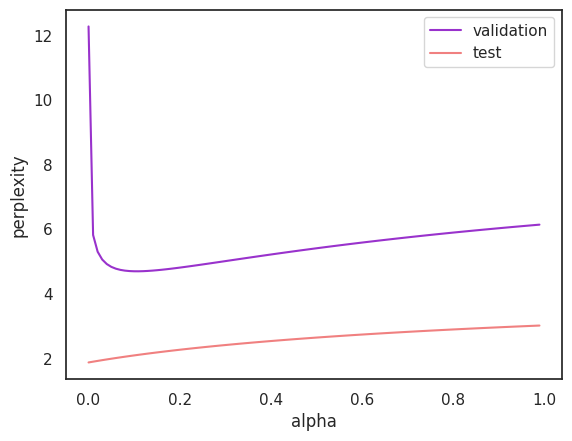

In [ ]:
df = calculate_perplexity(validation_set, test_set, model, pair_counts, word_counts)
ax = df.plot(x='alpha', y='validation', label='validation', color = 'darkorchid')
df.plot(x='alpha', y='test', label='test', ax=ax, color = 'lightcoral')
plt.xlabel('alpha')
plt.ylabel('perplexity')
plt.show()

### Interpret the results

*   What value of α worked the best for the validation set?
*   Was it the same that would have worked best for the test set?

**TODO**: Your answer

In [ ]:
def results (df):
  #validation set
  min=df['validation'].min()
  alpha = df.loc[df['validation']== min, 'alpha'].iloc[0]

  #test set
  min_test=df['test'].min()
  alpha_test = df.loc[df['test']== min_test, 'alpha'].iloc[0]

  print(f'α that minimize the held out perplexity of the validation set is :{alpha}')
  print(f'The validation set perplexity is : {round(min,4)}')
  print('\n')
  print(f'α that minimize the held out perplexity of the test set is :{alpha_test}')
  print(f'The test set perplexity is : {round(min_test,4)}')

In [ ]:
results(df)

α that minimize the held out perplexity of the validation set is :0.1101
The validation set perplexity is : 4.6923


α that minimize the held out perplexity of the test set is :0.0001
The test set perplexity is : 1.8696


The α value that minimizes the validation set is different than the one for the test set.

The alpha value that minimizes the heldout perplexity of the validation set is larger, indicating that choosing this value for the test set would lead to poor results. We belive there are few possible reasons for this:

1. When we use the validation set to tune a hyperparameter such as alpha, there is a risk of overfitting to the validation set.
2. The validation and test sets have a data mismatch in terms of the number of tokens and sentence length, despite having the same number of unique words (6) in both sets. Specifically, the validation set has 11 tokens and sentences of different lengths, while the test set has only 6 tokens.

#Bonus

In [ ]:
#open each dataset
with open('wiki.train.tokens', 'r') as f:
    train_data = f.read().split('\n')

with open('wiki.valid.tokens', 'r') as f:
    valid_data = f.read().split('\n')

with open('wiki.test.tokens', 'r') as f:
    test_data = f.read().split('\n')

In [ ]:
#insert each line to a sublist, so we get similar type of data as we were
#given before.
train_data = [line for line in train_data if line.strip()]
valid_data = [line for line in valid_data if line.strip()]
test_data = [line for line in test_data if line.strip()]

train_data = [line.split() for line in train_data]
valid_data = [line.split() for line in valid_data]
test_data = [line.split() for line in test_data]

In [ ]:
wiki_model = bigram_model()
trained_wiki = wiki_model.train(train_data)

V_wiki= count_unique_words(trained_wiki)
pair_counts_wiki, word_counts_wiki = wiki_model.prob(trained_wiki, 1)

In [ ]:
df_wiki = calculate_perplexity(valid_data, test_data, wiki_model, pair_counts_wiki, word_counts_wiki)

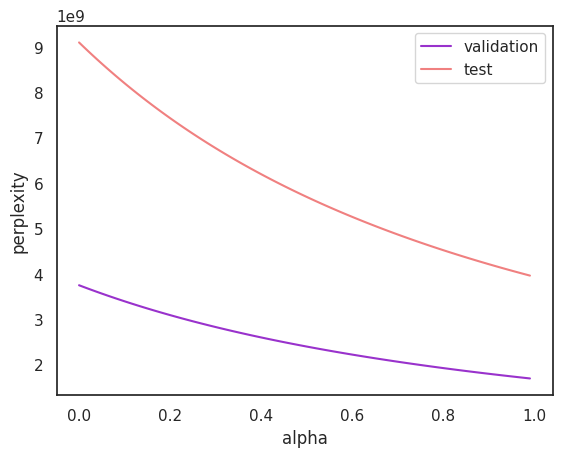

In [ ]:
ax = df_wiki.plot(x='alpha', y='validation', label='validation', color = 'darkorchid')
df_wiki.plot(x='alpha', y='test', label='test', ax=ax, color = 'lightcoral')
plt.xlabel('alpha')
plt.ylabel('perplexity')
plt.show()

In [ ]:
results(df_wiki)

α that minimize the held out perplexity of the validation set is :0.9901
The validation set perplexity is : 1703076097.801


α that minimize the held out perplexity of the test set is :0.9901
The test set perplexity is : 3968108381.4039


We can see that we got different results for this dataset. Since there are a lot more words -> the α that minimize the held out perplexity of the test and train set is the same.

# Export to PDF

Run the following cell to download the notebook as a nicely formatted pdf file.

In [ ]:
# Add to a new cell at the end of the notebook and run the follow code,
# which will save the notebook as pdf in your google drive (allow the permissions) and download it automatically.

!wget -nc https://raw.githubusercontent.com/scaperex/colab-pdf/master/colab_pdf.py

from colab_pdf import colab_pdf

# If you saved the notebook in the default location in your Google Drive,
#  and didn't change the name of the file, the code should work as is. If not, adapt accordingly.
# E.g. in your case the file name may be "Copy of XXXX.ipynb"

colab_pdf(file_name='hw2_question3.ipynb', notebookpath="drive/MyDrive/Colab Notebooks")

--2023-04-26 18:39:35--  https://raw.githubusercontent.com/scaperex/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1902 (1.9K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.86K  --.-KB/s    in 0s      

2023-04-26 18:39:35 (35.4 MB/s) - ‘colab_pdf.py’ saved [1902/1902]





Extracting templates from packages: 100%
[NbConvertApp] WARNING | pattern 'drive/MyDrive/Colab Notebooks/hw2_question3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-

'File Download Unsuccessful. Saved in Google Drive'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%shell
jupyter nbconvert --to html /content/hw2_question3.ipynb

[NbConvertApp] Converting notebook /content/hw2_question3.ipynb to html
[NbConvertApp] Writing 823773 bytes to /content/hw2_question3.html
